In [218]:
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import uproot
import pandas as pd
import numpy as np
import random
import csv
import time

%matplotlib notebook

In [222]:
# All parameter inputs will be integers.
# First parameter will be the number of total events.
# Second parameter will be the number of noise hits per event.
# Third parameter will be the number of tracks per event.
# Fourth Parameter will be the number of hits that lie on each track.
# Creates a csv file with name: toy_data_3.csv
# For the column, Point Belongs to Track, 0 represents no, 1 represents yes.

def main(number_of_events, number_of_noise_hits, tracks_per_event, number_of_track_hits):    
    event_number = 0
    with open('toy_data_3.csv', 'w', newline = '') as f:
        thewriter = csv.writer(f)

        thewriter.writerow(['Event Number', 'X - Coordinate', 
                            'Y - Coordinate', 'Z - Coordinate',
                            'Point Belongs to Track?: 0 = no, 1 = yes'])
    
        for i in range(number_of_events):
            fig = plt.figure()
            ax = fig.add_subplot(111, projection = '3d')
            
            for i in range(number_of_noise_hits):
                x = random.uniform(1, 1000)
                y = random.uniform(1, 1000)
                z = random.uniform(1, 1000)
                ax.scatter(x, y, z)
                
                thewriter.writerow([event_number, x, y, z, 0])

            for i in range(tracks_per_event):
                X_1 = random.uniform(1, 1000)
                Y_1 = random.uniform(1, 1000)
                Z_1 = random.uniform(1, 1000)
                X_2 = random.uniform(1, 1000)
                Y_2 = random.uniform(1, 1000)
                Z_2 = random.uniform(1, 1000)
                thewriter.writerow([event_number, X_1, Y_1, Z_1, 1])
                thewriter.writerow([event_number, X_2, Y_2, Z_2, 1])

                point_1 = [X_1, Y_1, Z_1]
                point_2 = [X_2, Y_2, Z_2]

                vector_x = (X_2 - X_1)
                vector_y = (Y_2 - Y_1)
                vector_z = (Z_2 - Z_1)

                vector = [vector_x, vector_y, vector_z]

                vector_length = math.sqrt((vector_x * vector_x) + 
                                          (vector_y * vector_y) + 
                                          (vector_z * vector_z))

                normal_x = (vector_x / vector_length)
                normal_y = (vector_y / vector_length)
                normal_z = (vector_z / vector_length)

                normal = [normal_x, normal_y, normal_z]

                for i in range(number_of_track_hits):
                    scalar = random.uniform(2, 999)

                    alpha_x = X_1 + (scalar * (normal_x))
                    alpha_y = Y_1 + (scalar * (normal_y))
                    alpha_z = Z_1 + (scalar * (normal_z))
                    
                    thewriter.writerow([event_number, alpha_x, alpha_y, alpha_z, 1])

                    alpha = [alpha_x, alpha_y, alpha_z]

                    X = [X_1, X_2, alpha_x]
                    Y = [Y_1, Y_2, alpha_y]
                    Z = [Z_1, Z_2, alpha_z]

                    ax.scatter(X, Y, Z)

                ax.plot(X, Y, Z)
            event_number = (event_number + 1)


        plt.show
    print(event_number)

In [227]:
# All parameter inputs will be integers.
# First parameter: number of total events.
# Second parameter: number of noise hits per event.
# Third parameter: number of tracks per event.
# Fourth Parameter: number of hits that lie on each track.

<IPython.core.display.Javascript object>


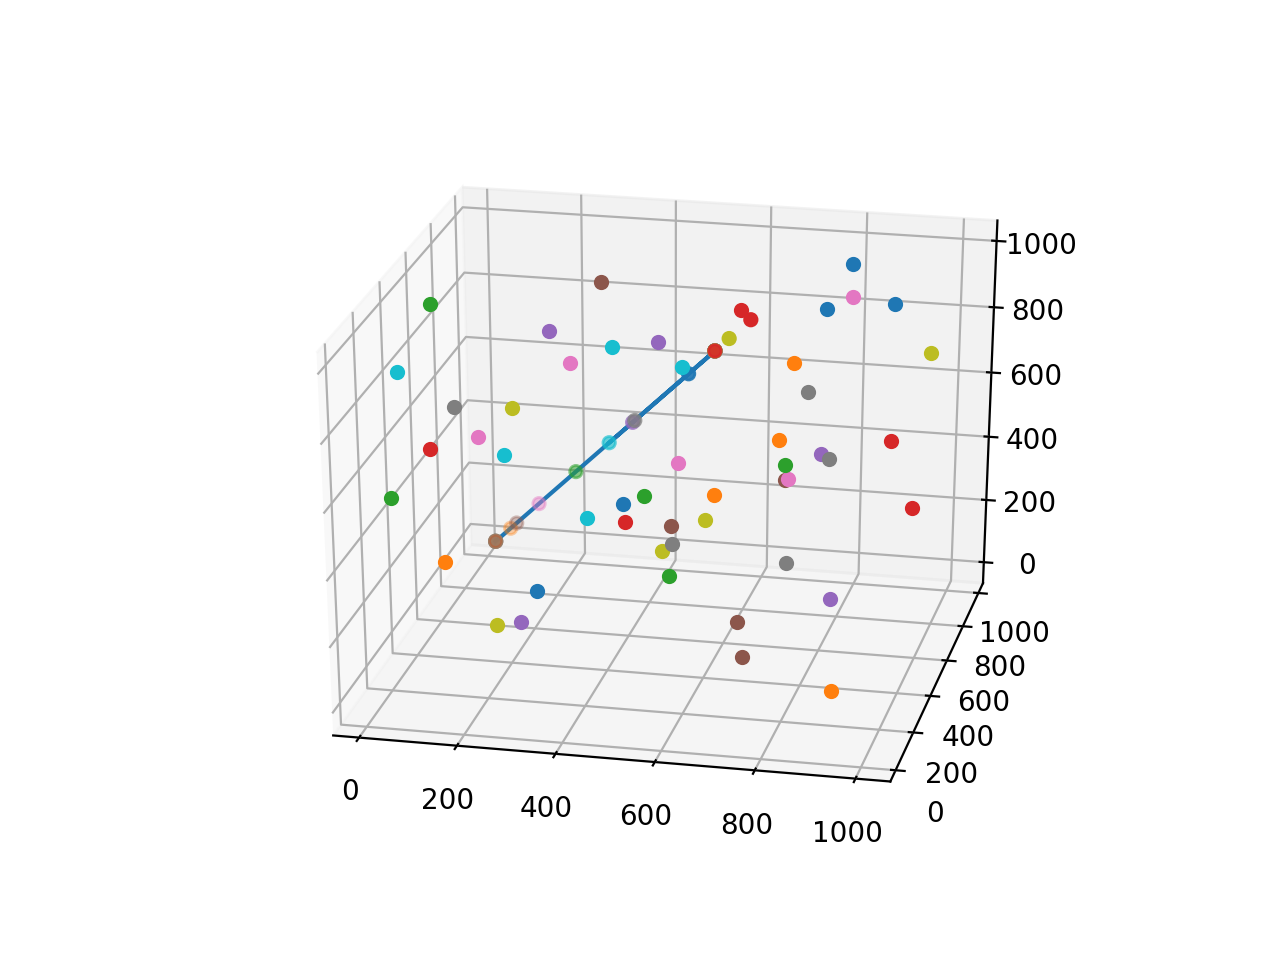

1


In [225]:
main(1, 50, 1, 10)